# AvaStats

In [1]:
import xml.etree.ElementTree as ET
import os
from pathlib import Path
from IPython.display import clear_output

# - for reloading libraries/modules - #
import importlib

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.ticker import AutoMinorLocator, FuncFormatter

if os.path.exists('latex_default.mplstyle'):
    plt.style.use('latex_default.mplstyle')

## I. Fetch Data (if necessary)

Download the required Data - **Download only what you need!** (Download Reports from Euregio-Albina and Tyrol Archive)
The downloaded data is cached in /data/bulletins. So if the up-to-date data is already updated, this step has not to be repeated.

In [2]:
from avastats.helpers import download_from_index

# ------------------------------------ #
# Switches - Configure download here!
tyrol_archive = False

albina_euregio = True
albina_euregio_restrict = True
# albina_euregio_restrict_start = "2021-12-01" # as string with YYYY-MM-DD
albina_euregio_restrict_start = "2018-12-01" # as string with YYYY-MM-DD
albina_euregio_restrict_end  = "2023-05-02" # as string with YYYY-MM-DD

eaws = False
albina_neighbors = False # Not yet productive, old format!
# ------------------------------------ #

local_dir = os.getcwd() + "/data/bulletins"
local_dir_eaws = os.getcwd() + "/data/eaws_bulletins"
directory = Path(local_dir)
directory.mkdir(parents=True, exist_ok=True)

if tyrol_archive:
    download_from_index(
        url="https://static.avalanche.report/bulletins/archive/tyrol/caaml/",
        local_dir=local_dir,
        details="tyrol_archive"
    )

if eaws:
    download_from_index(
        url="https://static.avalanche.report/eaws_bulletins/",
        local_dir=local_dir_eaws,
        details="albina_euregio_restrict",
        start=albina_euregio_restrict_start,
        end=albina_euregio_restrict_end
    )    
            
if albina_euregio:
    if albina_euregio_restrict:
        download_from_index(
            url="https://static.avalanche.report/bulletins/",
            local_dir=local_dir,
            details="albina_euregio_restrict",
            start=albina_euregio_restrict_start,
            end=albina_euregio_restrict_end
        )
    else:
        download_from_index(
            url="https://static.avalanche.report/bulletins/",
            local_dir=local_dir,
            details="albina_euregio"
        )

Try to download https://static.avalanche.report/bulletins/2018-12-04/2018-12-04_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-05/2018-12-05_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-06/2018-12-06_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-07/2018-12-07_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-08/2018-12-08_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-09/2018-12-09_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-10/2018-12-10_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-11/2018-12-11_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-12/2018-12-12_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-13/2018-12-13_de.xml
Try to download https://static.avalanche.report/bulletins/2018-12-14/2018-12-14_de.xml
Try to download https://static.avalanche.re

Try to download https://static.avalanche.report/bulletins/2019-03-09/2019-03-09_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-10/2019-03-10_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-11/2019-03-11_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-12/2019-03-12_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-13/2019-03-13_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-14/2019-03-14_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-15/2019-03-15_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-16/2019-03-16_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-17/2019-03-17_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-18/2019-03-18_de.xml
Try to download https://static.avalanche.report/bulletins/2019-03-19/2019-03-19_de.xml
Try to download https://static.avalanche.re

Try to download https://static.avalanche.report/bulletins/2019-12-23/2019-12-23_de.xml
Try to download https://static.avalanche.report/bulletins/2019-12-24/2019-12-24_de.xml
Try to download https://static.avalanche.report/bulletins/2019-12-25/2019-12-25_de.xml
Try to download https://static.avalanche.report/bulletins/2019-12-26/2019-12-26_de.xml
Try to download https://static.avalanche.report/bulletins/2019-12-27/2019-12-27_de.xml
Try to download https://static.avalanche.report/bulletins/2019-12-28/2019-12-28_de.xml
Try to download https://static.avalanche.report/bulletins/2019-12-29/2019-12-29_de.xml
Try to download https://static.avalanche.report/bulletins/2019-12-30/2019-12-30_de.xml
Try to download https://static.avalanche.report/bulletins/2019-12-31/2019-12-31_de.xml
Try to download https://static.avalanche.report/bulletins/2020-01-01/2020-01-01_de.xml
Try to download https://static.avalanche.report/bulletins/2020-01-02/2020-01-02_de.xml
Try to download https://static.avalanche.re

Try to download https://static.avalanche.report/bulletins/2020-03-27/2020-03-27_de.xml
Try to download https://static.avalanche.report/bulletins/2020-03-28/2020-03-28_de.xml
Try to download https://static.avalanche.report/bulletins/2020-03-29/2020-03-29_de.xml
Try to download https://static.avalanche.report/bulletins/2020-03-30/2020-03-30_de.xml
Try to download https://static.avalanche.report/bulletins/2020-03-31/2020-03-31_de.xml
Try to download https://static.avalanche.report/bulletins/2020-04-01/2020-04-01_de.xml
Try to download https://static.avalanche.report/bulletins/2020-04-02/2020-04-02_de.xml
Try to download https://static.avalanche.report/bulletins/2020-04-03/2020-04-03_de.xml
Try to download https://static.avalanche.report/bulletins/2020-04-04/2020-04-04_de.xml
Try to download https://static.avalanche.report/bulletins/2020-04-05/2020-04-05_de.xml
Try to download https://static.avalanche.report/bulletins/2020-04-06/2020-04-06_de.xml
Try to download https://static.avalanche.re

Try to download https://static.avalanche.report/bulletins/2021-01-30/2021-01-30_de.xml
Try to download https://static.avalanche.report/bulletins/2021-01-31/2021-01-31_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-01/2021-02-01_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-02/2021-02-02_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-03/2021-02-03_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-04/2021-02-04_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-05/2021-02-05_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-06/2021-02-06_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-07/2021-02-07_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-08/2021-02-08_de.xml
Try to download https://static.avalanche.report/bulletins/2021-02-09/2021-02-09_de.xml
Try to download https://static.avalanche.re

Try to download https://static.avalanche.report/bulletins/2021-05-05/2021-05-05_de.xml
Try to download https://static.avalanche.report/bulletins/2021-05-06/2021-05-06_de.xml
Try to download https://static.avalanche.report/bulletins/2021-05-07/2021-05-07_de.xml
Try to download https://static.avalanche.report/bulletins/2021-05-08/2021-05-08_de.xml
Try to download https://static.avalanche.report/bulletins/2021-05-09/2021-05-09_de.xml
Try to download https://static.avalanche.report/bulletins/2021-12-01/2021-12-01_de.xml
Try to download https://static.avalanche.report/bulletins/2021-12-02/2021-12-02_de.xml
Try to download https://static.avalanche.report/bulletins/2021-12-03/2021-12-03_de.xml
Try to download https://static.avalanche.report/bulletins/2021-12-04/2021-12-04_de.xml
Try to download https://static.avalanche.report/bulletins/2021-12-05/2021-12-05_de.xml
Try to download https://static.avalanche.report/bulletins/2021-12-06/2021-12-06_de.xml
Try to download https://static.avalanche.re

Try to download https://static.avalanche.report/bulletins/2022-03-01/2022-03-01_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-02/2022-03-02_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-03/2022-03-03_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-04/2022-03-04_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-05/2022-03-05_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-06/2022-03-06_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-07/2022-03-07_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-08/2022-03-08_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-09/2022-03-09_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-10/2022-03-10_de.xml
Try to download https://static.avalanche.report/bulletins/2022-03-11/2022-03-11_de.xml
Try to download https://static.avalanche.re

Try to download https://static.avalanche.report/bulletins/2023-01-07/2023-01-07_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-08/2023-01-08_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-09/2023-01-09_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-10/2023-01-10_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-11/2023-01-11_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-12/2023-01-12_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-13/2023-01-13_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-14/2023-01-14_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-15/2023-01-15_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-01-16/2023-01-16_EUREGIO_de.xml
Try to download https://static.avalanche.report/bu

Try to download https://static.avalanche.report/bulletins/2023-04-04/2023-04-04_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-05/2023-04-05_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-06/2023-04-06_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-07/2023-04-07_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-08/2023-04-08_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-09/2023-04-09_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-10/2023-04-10_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-11/2023-04-11_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-12/2023-04-12_EUREGIO_de.xml
Try to download https://static.avalanche.report/bulletins/2023-04-13/2023-04-13_EUREGIO_de.xml
Try to download https://static.avalanche.report/bu

## II: Install Packages from Subfolder/Subprojects

It may be a good idea to update the submodules sometimes. But it is also possible, that a breaking change in the submodules could also break the code below.

To initiate git submodules (first time) use:
- `git submodule init`

To install the Submodules use:
- `git submodule update`

Current tested Versions:

- pyAvaCore: Commit SHA e25c7bbc793a208c3c70ef3211cf4e0b169281d8

Then Install pyAvaCore with the line below:

In [2]:
import sys
!{sys.executable} -m pip install -e pyAvaCore_old
# Alternatively run this command within avastats in the Terminal to install pyAvaCore

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///D:/lwd/diverses/Avareport-Statistics/avareport-statistics/avastats/pyAvaCore_old
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for pyAvaCore


## III Data analysis

### 1. Danger Level Histogram

In [2]:
from avastats.avacore_connector import AvacoreConnector

# ------------------------------------ #
# Switches
#start = datetime.date(2022,12,7) #"2021-10-01" # as string with YYYY-MM-DD
start = datetime.date(2022,11,15)
#end   = datetime.date(2023,5,2) #"2022-04-24" # as string with YYYY-MM-DD
end   = datetime.date(2023,5,15)
regions_of_interest = ['AT-07','IT-32-BZ','IT-32-TN'] 
# Euregio_regions are possible, e. g. ['AT-07', 'IT-32-BZ'] and AT7 for tyrolian archive

if end < datetime.date(2022, 12, 7):
    prefix_dict = {
        "AT-07": "de.xml",
        "AT7": "TYROL",
        "IT-32-BZ": "de.xml",
        "IT-32-TN": "de.xml",
        "IT-32":'ITALIA'
    }
else:
    prefix_dict = {
        "AT-07": "EUREGIO",
        "AT7": "TYROL",
        "IT-32-BZ": "EUREGIO",
        "IT-32-TN": "EUREGIO",
        "IT-32":'ITALIA'
    }

# ------------------------------------ #

connector =  AvacoreConnector()
macro_regions = connector.get_macro_regions()

day_range = pd.date_range(start=start,end=end).to_pydatetime().tolist()

d_max              = []
d_morning          = []
d_afternoon        = []
micro_regions_axes = []

for macro_id in regions_of_interest:
    d_max_n, d_morning_n, d_afternoon_n, micro_regions_axes_n = connector.get_dangerlevels_for_region(macro_id, day_range, macro_filename=prefix_dict[macro_id])
    d_max.append(d_max_n)
    d_morning.append(d_morning_n)
    d_afternoon.append(d_afternoon_n)
    micro_regions_axes.append(micro_regions_axes_n)

micro_regions_axes = np.concatenate(micro_regions_axes)
df_d_max           = pd.DataFrame(data=np.concatenate(d_max), index=micro_regions_axes)
df_d_morning       = pd.DataFrame(data=np.concatenate(d_morning), index=micro_regions_axes)
df_d_afternoon     = pd.DataFrame(data=np.concatenate(d_afternoon), index=micro_regions_axes)

df_max = df_d_max.max().to_frame()
# only count days with report (-1 for no report)
df_max = df_max[df_max != -1]
df_max.dropna(inplace=True)
n_days = len(df_max)
print('Number of days with avalanche bulletins: ', str(n_days))
df_max.columns = ['count']
df_max = df_max['count'].value_counts(sort=False) # index represents 'danger level'
df_max = df_max.to_frame()

# - Optional: usually not needed since -1 are considered before - #
# df_max.replace(to_replace=[None, -1], value=np.nan, inplace=True)

# - Use the following line in case no days with danger level 5 - #
for danger_level in [1,2,3,4,5]:
    if not danger_level in df_max.index:
        df_max.loc[danger_level] = 0

# - Sort for index - #
#df_max = df_max.set_index('index')
df_max = df_max.sort_index()
df_max['freq'] = df_max['count']/ n_days * 100
# df_max

ModuleNotFoundError: No module named 'pyAvaCore'

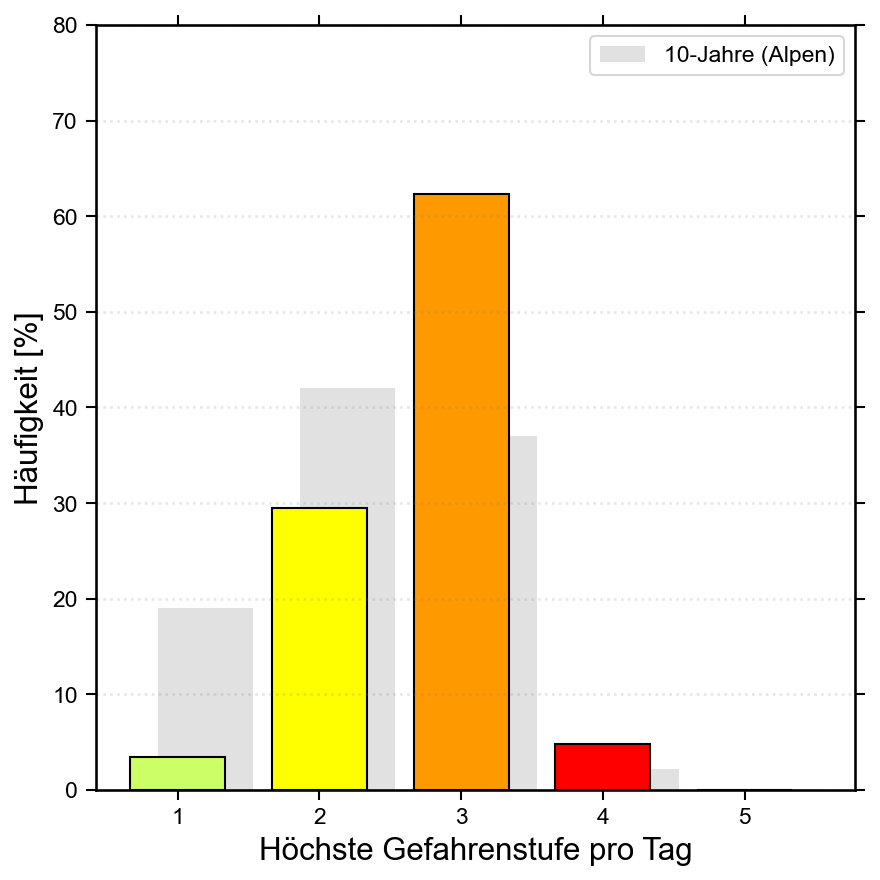

In [20]:
plt.style.use('latex_default.mplstyle')
plt.rcParams["font.family"] = "Arial"
color_palette = ['#ccff66','#ffff00','#ff9900','#ff0000','black']

# - Add bars for 10-year alp average - #
ALPS_DANGER_LEVELS = [19,42,37,2.2,0.1] # HARDCODED (data from SLF website)
df_avg = df_max.copy()
df_avg.loc[:,'freq'] = ALPS_DANGER_LEVELS

# label = {"x": "Highest danger level per day", "y": "Frequency / %"}
label = {"x": "Höchste Gefahrenstufe pro Tag", "y": "Häufigkeit [%]"}
# label = {"x": "Scala di pericolo", "y": "Frequenza"}

barlabel = '10-Jahre (Alpen)'
#barlabel = '10-year average (Alps)'

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
ax.grid(axis='y')
ax.bar(df_avg.index+0.2,df_avg['freq'],width=0.67,color='lightgrey',align='center',alpha=0.67, label=barlabel)
ax.bar(df_max.index,df_max['freq'],width=0.67,color=color_palette, edgecolor='black',align='center') # bottom=df['bottom'], alpha=0.4
# ax.set_xticklabels(['1','2','3','4','5'])
plt.xlabel(label["x"],fontsize=15)
plt.ylabel(label["y"],fontsize=15)
ax.set_ylim([0,80])
#plt.xlabel(label["x"],fontsize=15, fontfamily='arial')
#plt.ylabel(label["y"],fontsize=15, fontfamily='arial')
ax.legend()

# Save Plot to File
filename = "dangerLevel-histogram"
out_dir = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)

fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)
# fig.savefig(f'{out_dir}/{filename}.pdf')

## 2. Maximum danger levels over time (season)


In [21]:
from avastats.avacore_connector import AvacoreConnector

# ------------------------------------ #
# Switches - Configure download here!
start = datetime.date(2022,11,15) #"2021-10-01" # as string with YYYY-MM-DD
end   = datetime.date(2023,5,15) #"2022-04-24" # as string with YYYY-MM-DD
#start = datetime.date(2021,12,1)
#end   = datetime.date(2022,5,2)
regions_of_interest = ['AT-07','IT-32-BZ','IT-32-TN'] 
# Euregio_regions are possible, e. g. ['AT-07', 'IT-32-BZ'] and AT7 for tyrolian archive

if end < datetime.date(2022, 12, 7):
    prefix_dict = {
        "AT-07": "de.xml",
        "AT7": "TYROL",
        "IT-32-BZ": "de.xml",
        "IT-32-TN": "de.xml",
        "IT-32":'ITALIA'
    }
else:
    prefix_dict = {
        "AT-07": "EUREGIO",
        "AT7": "TYROL",
        "IT-32-BZ": "EUREGIO",
        "IT-32-TN": "EUREGIO",
        "IT-32":'ITALIA'
    }
# ------------------------------------ #

connector =  AvacoreConnector()
macro_regions = connector.get_macro_regions()

day_range = pd.date_range(start=start,end=end).to_pydatetime().tolist()

d_max              = []
d_morning          = []
d_afternoon        = []
micro_regions_axes = []

for macro_id in regions_of_interest:
    d_max_n, d_morning_n, d_afternoon_n, micro_regions_axes_n = connector.get_dangerlevels_for_region(macro_id, day_range, macro_filename=prefix_dict[macro_id])
    d_max.append(d_max_n)
    d_morning.append(d_morning_n)
    d_afternoon.append(d_afternoon_n)
    micro_regions_axes.append(micro_regions_axes_n)

micro_regions_axes = np.concatenate(micro_regions_axes)
df_d_max           = pd.DataFrame(data=np.concatenate(d_max), index=micro_regions_axes)
df_d_morning       = pd.DataFrame(data=np.concatenate(d_morning), index=micro_regions_axes)
df_d_afternoon     = pd.DataFrame(data=np.concatenate(d_afternoon), index=micro_regions_axes)

# - Calculate percentage for every day of season - #
danger_levels = [0,0,0,0,0]
days = np.arange(np.shape(df_d_max)[1])
freq_dict = {}

for day in day_range:
    freq_dict[day]=danger_levels
df_freq = pd.DataFrame.from_dict(freq_dict)
# df_freq = df_freq.set_index()

for col in range(np.shape(df_d_max)[1]):
    date = df_freq.columns[col]
    df_freq.loc[0,date] = (df_d_max[col] == 1).sum()
    df_freq.loc[1,date] = (df_d_max[col] == 2).sum()
    df_freq.loc[2,date] = (df_d_max[col] == 3).sum()
    df_freq.loc[3,date] = (df_d_max[col] == 4).sum()
    df_freq.loc[4,date] = (df_d_max[col] == 5).sum()

non_negative_counts = (df_d_max != -1).sum()
n_regions = non_negative_counts.max()    

df_freq = df_freq / n_regions * 100

# - Preparation for bar plot - #
df_freq_cum=df_freq.cumsum()
i=np.arange(1,5)
df_freq_cum.loc[i]=df_freq_cum.loc[i-1].values
df_freq_cum.loc[0,:] = 0
df_freq_cum=df_freq_cum.T
df_freq=df_freq.T
# df_freq

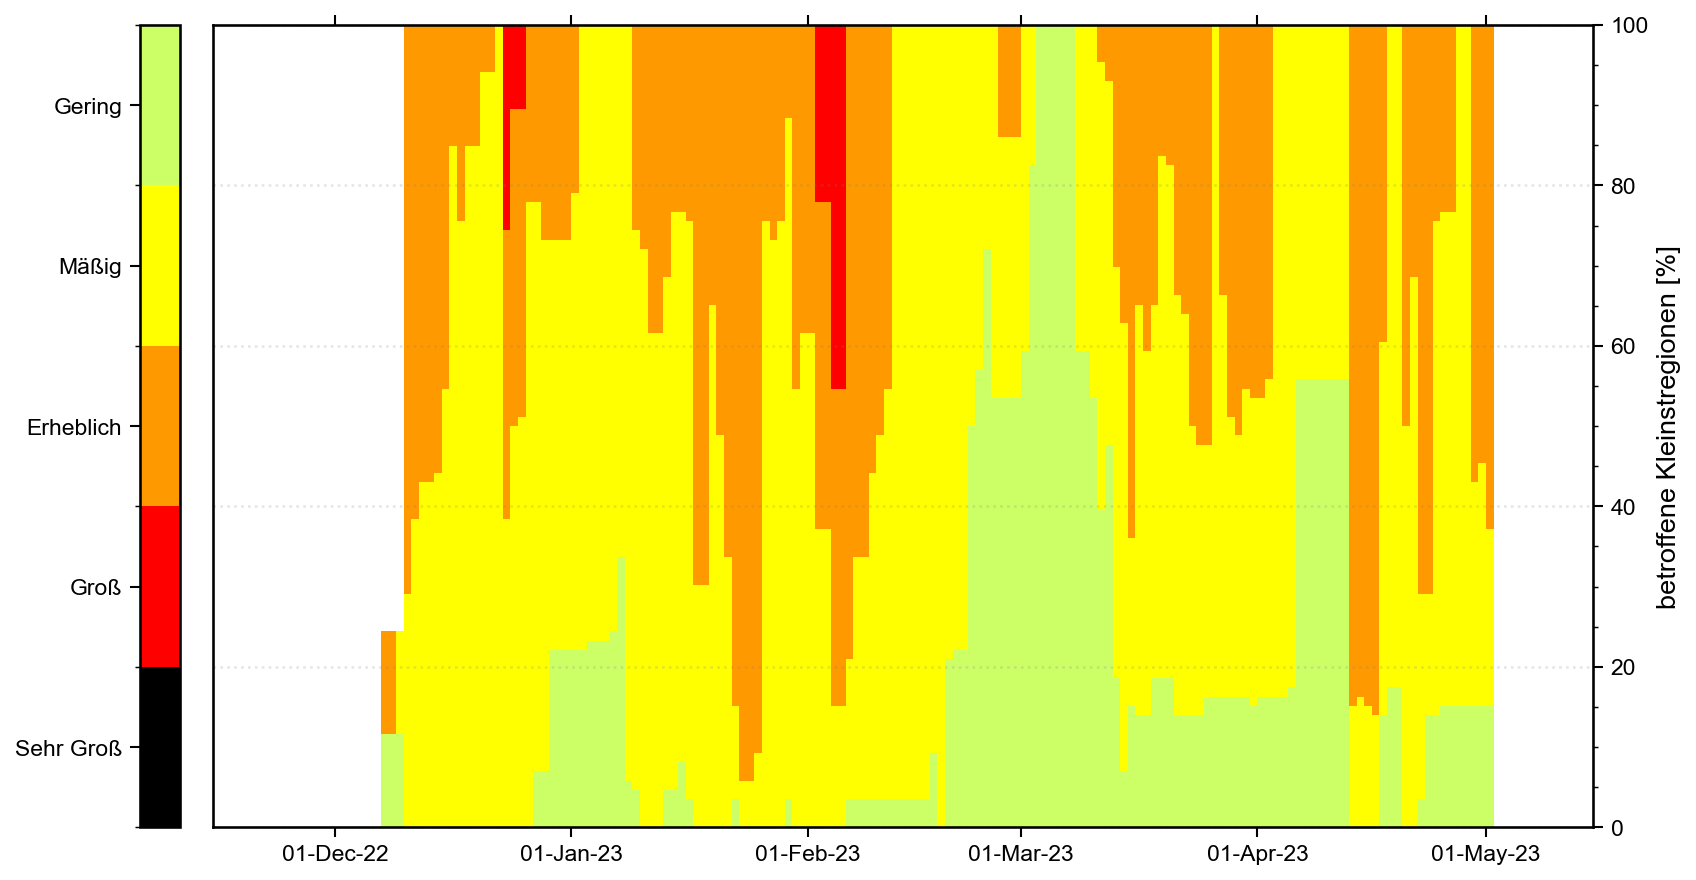

In [22]:
# - VISUALIZATION - #
plt.style.use('latex_default.mplstyle')
plt.rcParams["font.family"] = "Arial"
#plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots(1,1,figsize=(12,6))

def plot_danger_levels_over_time(ax):
    COLS_DANGER_LEVELS = ['#ccff66','#ffff00','#ff9900','#ff0000','black']
    DANGERLEVS_NAMES = [ "Gering", "Mäßig", "Erheblich", "Groß", "Sehr Groß"]
    #DANGERLEVS_NAMES = [ "Low", "Moderate", "Considerable", "High", "Very High"]
    COL_INDEXES   = np.arange(0,6)
    col_dict = dict(zip(COL_INDEXES,COLS_DANGER_LEVELS[::-1]))
    cmap = ListedColormap([col_dict[x] for x in col_dict.keys()])

    w=df_freq.index[1]-df_freq.index[0]
    for day in df_freq.index:
        bar_plot = ax.bar(day, df_freq.loc[day], bottom=df_freq_cum.loc[day], width=w, align='edge', color=COLS_DANGER_LEVELS)

    # - COLORBAR (Norm, bins, formatter, ticks) ** lots of stuff to make colorbar look nice - #
    n_bar = len(COLS_DANGER_LEVELS)
    lulu = np.zeros((n_bar,n_bar))
    for nn,k in enumerate(col_dict.keys()):
        lulu[nn, :] = k
    norm_bins = np.sort([*col_dict.keys()]) + 0.5
    norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)

    norm = BoundaryNorm(norm_bins, n_bar, clip=True)
    fmt = FuncFormatter(lambda x, pos: DANGERLEVS_NAMES[::-1][norm(x)])
    diff = norm_bins[1:] - norm_bins[:-1] 
    tickz = norm_bins[:-1] + diff / 2

    contf = ax.contourf(lulu,cmap=cmap,norm=norm,levels=norm_bins) # just for colorbar
    cbar = fig.colorbar(contf, ax=ax, format=fmt, ticks=tickz,location='left', pad=0.02)

    # - AXES - #
    ax.set_xlim(df_freq.index[0],df_freq.index[-1])

    ax.grid(axis='x')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax.set_ylim([0,100])
    
    ylabel = "betroffene Kleinstregionen [%]"
    #ylabel = "Regions affected / %"
    
    ax.set_ylabel(ylabel, fontsize=13)

    myLoc = mdates.MonthLocator()
    myFmt = mdates.DateFormatter('%d-%b-%y') # %Y-%b-%d 
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(myLoc)
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax

ax = plot_danger_levels_over_time(ax)

# --- Save figure --- #
filename  = 'dangerLevels-over-season'
out_dir   = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)

## 3. Avalanche Problems over time

In [23]:
import avastats.avacore_connector
importlib.reload(avastats.avacore_connector)

# ------------------------------------ #
start_season = "2022-11-15" # as string with YYYY-MM-DD
end_season   = "2023-05-15" # as string with YYYY-MM-DD

regions_of_interest = ['AT-07','IT-32-BZ','IT-32-TN']
# Euregio_regions are possible, e. g. ['AT-07', 'IT-32-BZ']

avaProbs = [ "new_snow", "wind_drifted_snow", "persistent_weak_layers", "wet_snow", "gliding_snow"]
# avaProbs = [ "new_snow", "wind_drifted_snow", "persistent_weak_layers", "wet_snow", "gliding_snow", "cornice_failure"]
# ava_problems = [ "new_snow", "wind_drifted_snow", "persistent_weak_layers", "wet_snow", "gliding_snow", "cornice_failure", "favourable_situation" ]
# ------------------------------------ #

connector =  avastats.avacore_connector.AvacoreConnector()
local_dir = os.getcwd() + "/data/bulletins"
df_avaProbs = connector.get_avalanche_problems(local_dir,start_season,end_season,regions_of_interest,avaProbs)

C:\Users\felix\AppData\Local\Temp\ipykernel_16520\3377505522.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(AVAPROBS_NAMES[::-1])


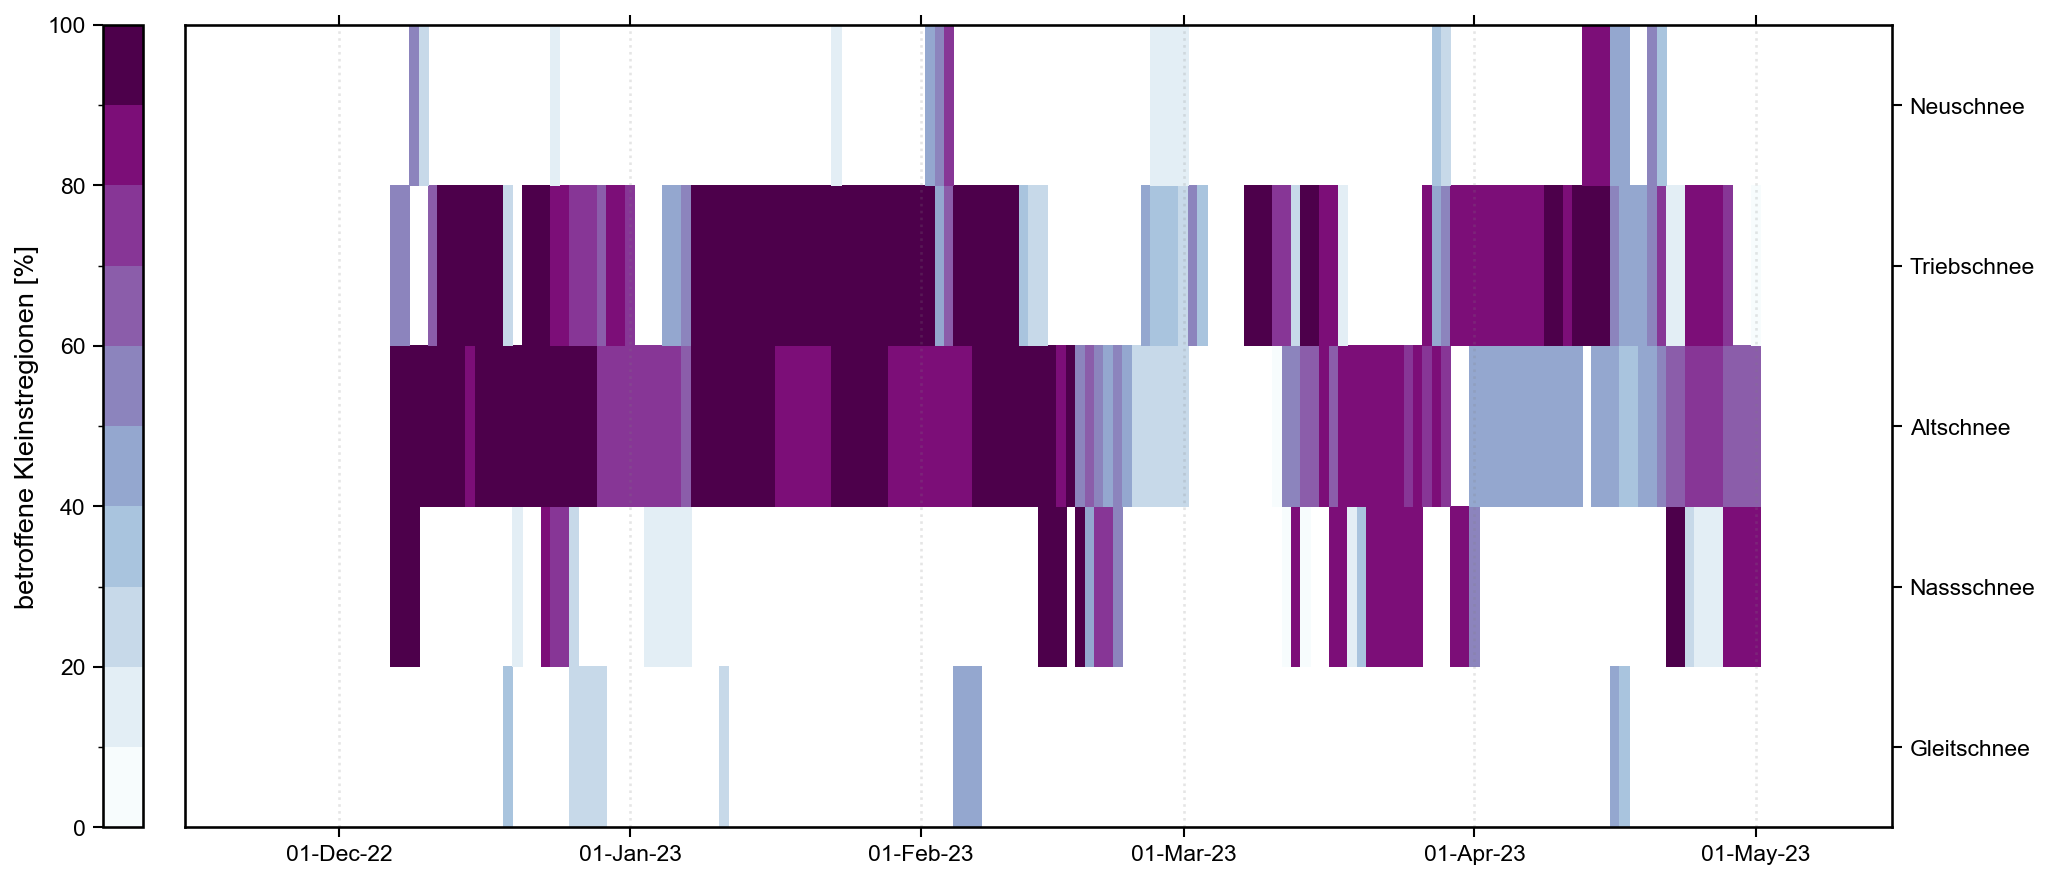

In [24]:
# - VISUALIZATION OF AVA PROBLEMS - #
fig, ax = plt.subplots(1,1,figsize=(15,6))
plt.rcParams["font.family"] = "Arial"

def plot_avalanche_problems_over_time(ax):
    data_temp = df_avaProbs.T.to_numpy()
    data = np.where(data_temp>1,data_temp,np.nan)
    data = data[::-1,:]

    AVAPROBS_NAMES = [ "Neuschnee", "Triebschnee", "Altschnee", "Nassschnee", "Gleitschnee"]
    #AVAPROBS_NAMES = [ "New Snow", "Wind-Drifted Snow", "Persistent Weak Layer", "Wet Snow", "Gliding Snow"]
    #AVAPROBS_NAMES = [ "New Snow", "Wind-Drifted Snow", "Persistent Weak Layer", "Wet Snow", "Gliding Snow", "Cornice Failure"]

    cmap = plt.get_cmap('BuPu')
    bounds = np.linspace(0,100,11)
    norm = BoundaryNorm(bounds,cmap.N)

    pcolor = ax.pcolor(df_avaProbs.index, avaProbs, data, shading='auto', cmap=cmap, norm=norm)
    cbar = fig.colorbar(pcolor, ax=ax, pad=0.02,location='left') # pad=0.02, shrink=0.67
    # cbar = fig.colorbar(pcolor, location='top',fraction=0.05, shrink=1) # pad=0.02, shrink=0.67
    
    ylabel = "betroffene Kleinstregionen [%]"
    #ylabel = "Regions affected / %"
    
    cbar.set_label(ylabel, fontsize=13)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(axis='y')
    myLoc = mdates.MonthLocator()
    myFmt = mdates.DateFormatter('%d-%b-%y') # %Y-%b-%d
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(myLoc)
    ax.set_yticklabels(AVAPROBS_NAMES[::-1])

    return ax

ax = plot_avalanche_problems_over_time(ax)

# --- Save figure --- #
filename  = 'avaProblems-over-season'
out_dir   = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)

## 4. Dangerpatternanalysis

Generate a Plot over the usage of Dangerpatterns over a given time.

Works only for EUREGIO at the Moment

In [33]:
import avastats.avacore_connector
importlib.reload(avastats.avacore_connector)

# ------------------------------------ #
#start_season = "2021-11-15" # as string with YYYY-MM-DD
start_season = "2021-11-15" # as string with YYYY-MM-DD
end_season   = "2022-05-15" # as string with YYYY-MM-DD

regions_of_interest = ['AT-07','IT-32-BZ','IT-32-TN']
# Euregio_regions are possible, e. g. ['AT-07', 'IT-32-BZ']

patterns = ['DP1', 'DP2', 'DP3', 'DP4', 'DP5', 'DP6', 'DP7', 'DP8', 'DP9', 'DP10']
# ------------------------------------ #

connector =  avastats.avacore_connector.AvacoreConnector()
local_dir = os.getcwd() + "/data/bulletins"
df_danger_patterns = connector.get_danger_patterns(local_dir,start_season,end_season,regions_of_interest,patterns)

C:\Users\felix\AppData\Local\Temp\ipykernel_16520\1160131186.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(PATTERNS_NAMES[::-1])


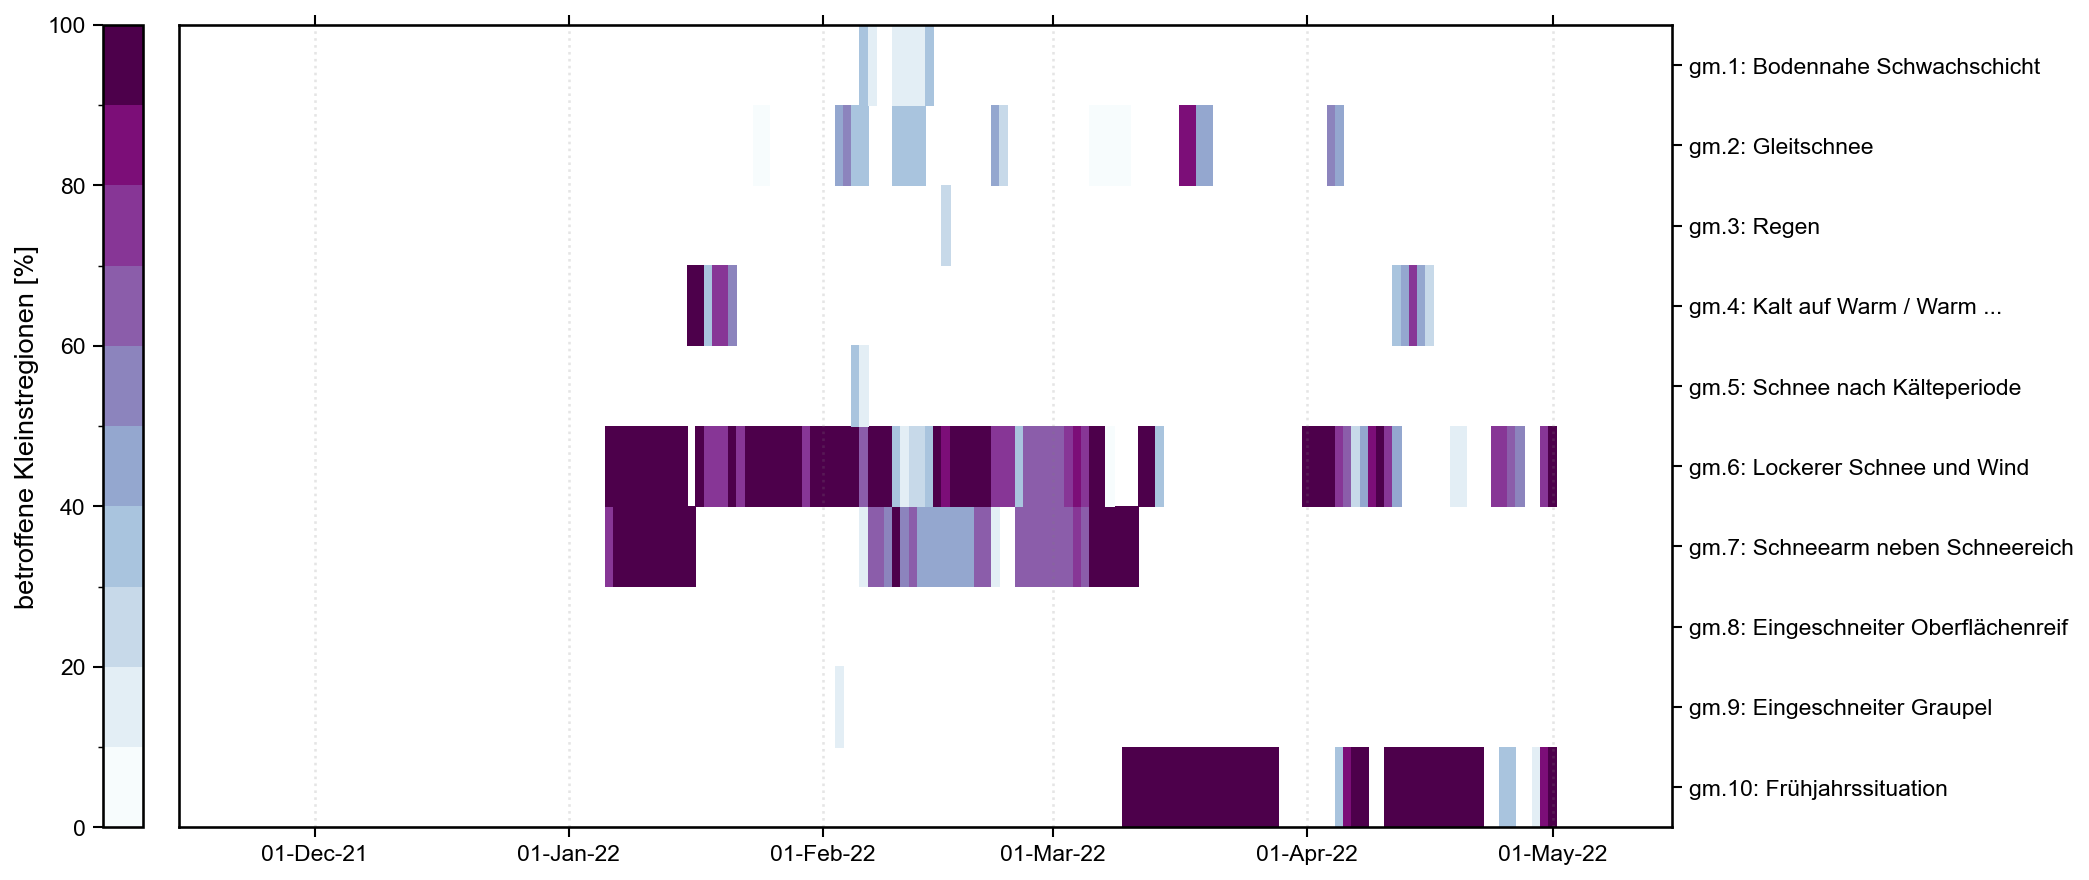

In [34]:
# - VISUALIZATION OF DPs - #
fig, ax = plt.subplots(1,1,figsize=(15,6))
plt.rcParams["font.family"] = "Arial"

def plot_danger_patterns_over_time(ax):
    data_temp = df_danger_patterns.T.to_numpy()
    data = np.where(data_temp>1,data_temp,np.nan)
    data = data[::-1,:]
    PATTERNS_NAMES = ['gm.1: Bodennahe Schwachschicht', 'gm.2: Gleitschnee', 'gm.3: Regen',
                      'gm.4: Kalt auf Warm / Warm ...', 'gm.5: Schnee nach Kälteperiode',
                      'gm.6: Lockerer Schnee und Wind', 'gm.7: Schneearm neben Schneereich', 'gm.8: Eingeschneiter Oberflächenreif',
                      'gm.9: Eingeschneiter Graupel', 'gm.10: Frühjahrssituation']
    #PATTERNS_NAMES = ['DP01: Deep Persistent WL', 'DP02: Gliding Snow', 'DP03: Rain on Snow', 'DP04: Cold on Warm, Warm ...', 'DP05: Snow after long Cold Period', 'DP06: Loose Snow and Wind', 'DP07: Shallow next to Deep', 'DP08: Buried Surface Hoar', 'DP09: Buried Graupel', 'DP10: Springtime Situation']

    # cmap = plt.get_cmap('YlOrBr')
    # cmap = plt.get_cmap('gnuplot_r')
    # cmap = plt.get_cmap('terrain_r')
    # cmap = plt.get_cmap('plasma_r')
    cmap = plt.get_cmap('BuPu')

    bounds = np.linspace(0,100,11)
    norm = BoundaryNorm(bounds,cmap.N)

    pcolor = ax.pcolor(df_danger_patterns.index, patterns, data, shading='auto', cmap=cmap, norm=norm)
    cbar = fig.colorbar(pcolor, ax=ax, pad=0.02, location='left') # pad=0.02, shrink=0.67
    # cbar = fig.colorbar(pcolor, location='top',fraction=0.05, shrink=1) # pad=0.02, shrink=0.67
    
    ylabel = "betroffene Kleinstregionen [%]"
    #ylabel = "Regions affected / %"
    
    cbar.set_label(ylabel, fontsize=13)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(axis='y')
    myLoc = mdates.MonthLocator()
    myFmt = mdates.DateFormatter('%d-%b-%y') # %Y-%b-%d
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(myLoc)
    ax.set_yticklabels(PATTERNS_NAMES[::-1])

    return ax

ax = plot_danger_patterns_over_time(ax)

# --- Save figure --- #
filename  = 'dangerPatterns-over-season'
out_dir   = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)

## 5. Euregio regions summary

- bar charts of how many warning regions concerned Tyrol,    
  Trento, South Tyrol, Tyrol and Trentino, Tyrol and South 
  Tyrol, South Tyrol and Trentino, or Tyrol, South Tyrol and
  Trentino
- Boxplot of distribution from warning regions
- Bar plot that includes # of reports, # of blog entries, # of internal trainings

In [38]:
import avastats.avacore_connector
importlib.reload(avastats.avacore_connector)

connector =  avastats.avacore_connector.AvacoreConnector()
local_dir = os.getcwd() + "/data/bulletins"
# ------------------------------------ #
start_season = "2018-11-15" # as string with YYYY-MM-DD
end_season   = "2023-05-15" # as string with YYYY-MM-DD
filename_blog = '2022-23_blogs.csv'
filename_trainings = '2022-23_trainings.csv'

regions_of_interest = ['AT-07','IT-32-BZ','IT-32-TN']
# ------------------------------------ #
df_reports_mean, df_tasks = connector.get_bulletin_distribution(local_dir,start_season,end_season,regions_of_interest)
nb_bulletins_avg = df_tasks.loc[:,'reports'].sum()
# ------------------------------------ #
start_season = "2022-09-01" # as string with YYYY-MM-DD
end_season   = "2023-06-01" # as string with YYYY-MM-DD

regions_of_interest = ['AT-07','IT-32-BZ','IT-32-TN']
# ------------------------------------ #
df_reports, df_tasks = connector.get_bulletin_distribution(local_dir,start_season,end_season,regions_of_interest)

# - FETCH BLOG + TRAININGS DATES (PROVIDED VIA CSV-FILES) - #
df_blogs = pd.read_csv('data/'+filename_blog, delimiter=';', index_col=['index'], parse_dates=['Datum'])
df_blogs['Date'] = df_blogs['Datum'].dt.date
for date in df_tasks.index:
    temp_lst = df_blogs.index[df_blogs['Date'] == date].tolist()
    for i in temp_lst:
        if df_blogs.loc[i,'Warndienst'] == 'Tyrol':
            df_tasks.loc[date,'blogs_ty'] += 1
        elif df_blogs.loc[i,'Warndienst'] == 'South Tyrol':
            df_tasks.loc[date,'blogs_bz'] += 1
        elif df_blogs.loc[i,'Warndienst'] == 'Trentino':
            df_tasks.loc[date,'blogs_tn'] += 1

df_trainings = pd.read_csv('data/'+filename_trainings, delimiter=';', index_col=['index'], parse_dates=['Datum'])
df_trainings['Date'] = df_trainings['Datum'].dt.date
for date in df_tasks.index:
    temp_lst = df_trainings.index[df_trainings['Date'] == date].tolist()
    for i in temp_lst:
        if df_trainings.iloc[i]['Virtual Training'] == 1:
            df_tasks.loc[date,'virtual_training'] += 1
        elif df_trainings.iloc[i]['Field Training'] == 1:
            df_tasks.loc[date,'field_training'] += 1

Number of reports matches count: 4030 reports collected
Number of reports matches count: 708 reports collected


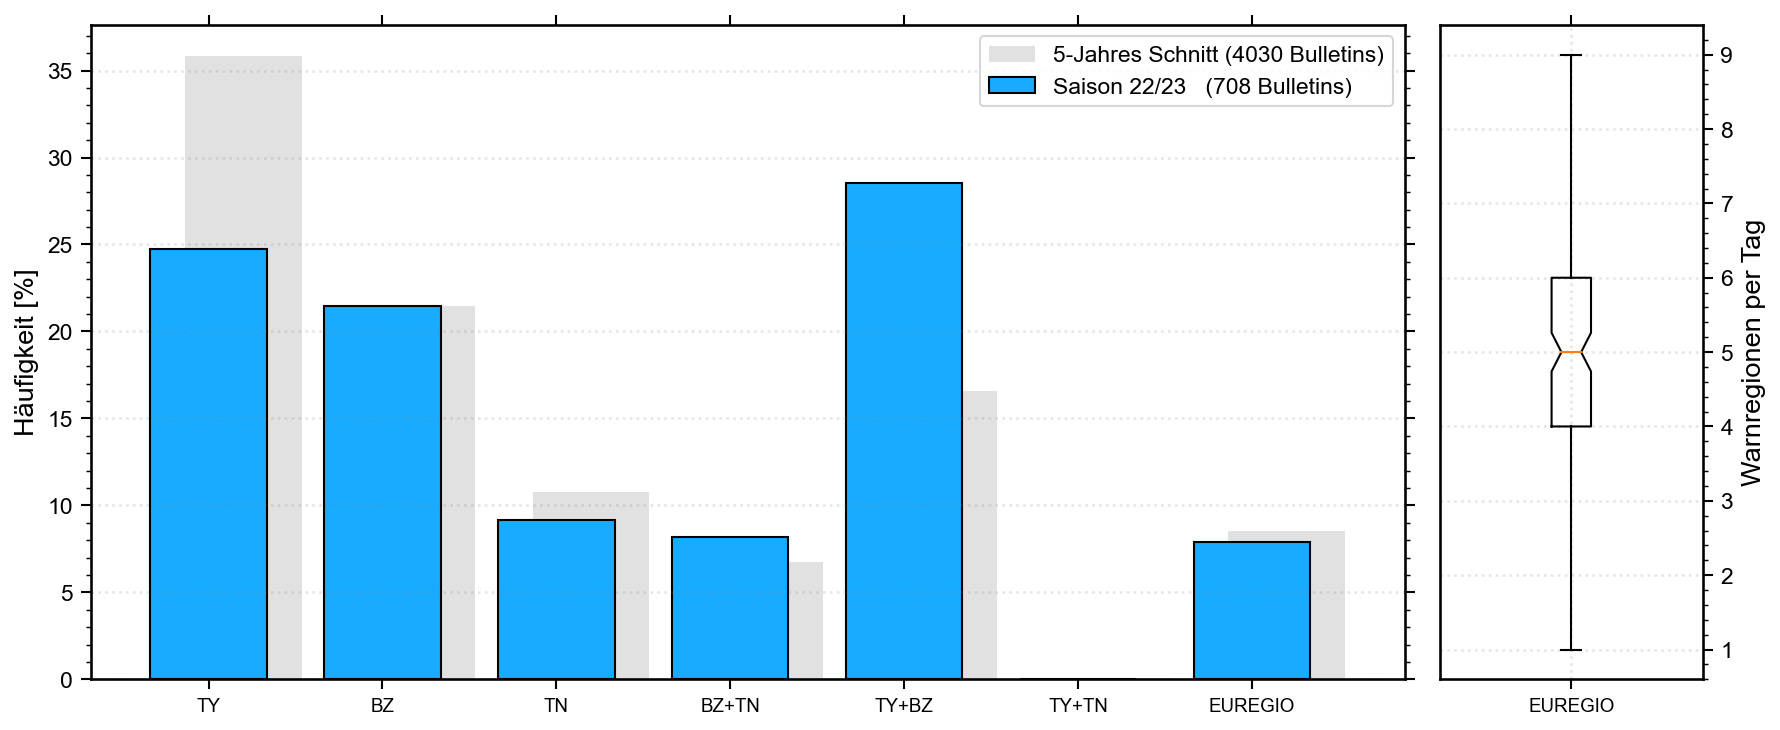

In [39]:
# - VISUALIZATION - #
REGION_NAMES = ['AT07', 'IT32BZ', 'IT32TN', 'IT32BZ+TN',  'AT07+IT32BZ', 'AT07+IT32TN', 'AT07+IT32BZ+TN']
REGION_NAMES = ['TY', 'BZ', 'TN', 'BZ+TN',  'TY+BZ', 'TY+TN', 'EUREGIO']

avg_index = np.arange(7)

avg_label = '5-Jahres Schnitt (' + str(nb_bulletins_avg) + ' Bulletins)'
season_label = 'Saison 22/23   (' + str(df_tasks['reports'].sum()) + ' Bulletins)'

#avg_label = '4-year average (' + str(nb_bulletins_avg) + ' Bulletins)'
#season_label = 'Season 21/22   (' + str(df_tasks['reports'].sum()) + ' Bulletins)'

fig, [ax,ax2] = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios': [5, 1]})
plt.rcParams["font.family"] = "Arial"
w=0.67
ax.bar(avg_index+0.2,df_reports_mean.loc['freq',:],width=w,color='lightgrey',align='center',alpha=0.67, label=avg_label)
bar_plot = ax.bar(REGION_NAMES, df_reports.loc['freq',:], width=w, align='center', edgecolor='black', color='#19abff', label=season_label)
ax.legend()

# - AXES - #
ax.grid(axis='x')
ylabel = 'Häufigkeit [%]'
#ylabel = 'Frequency / %'
ax.set_ylabel(ylabel, fontsize=13)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', labelsize=9)

# - Boxplot - #
filtered_data = df_tasks.loc[:,'reports'][~(df_tasks.loc[:,'reports']==0)]
ax2.boxplot(filtered_data, labels=['EUREGIO'], notch=True)
ax2.tick_params(axis='x', labelsize=9)
ax2.set_ylabel("Warnregionen per Tag", fontsize=13)
#ax2.set_ylabel("Warning regions per day")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# --- Save figure --- #
filename  = 'region-overlaps-histogram'
out_dir   = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)

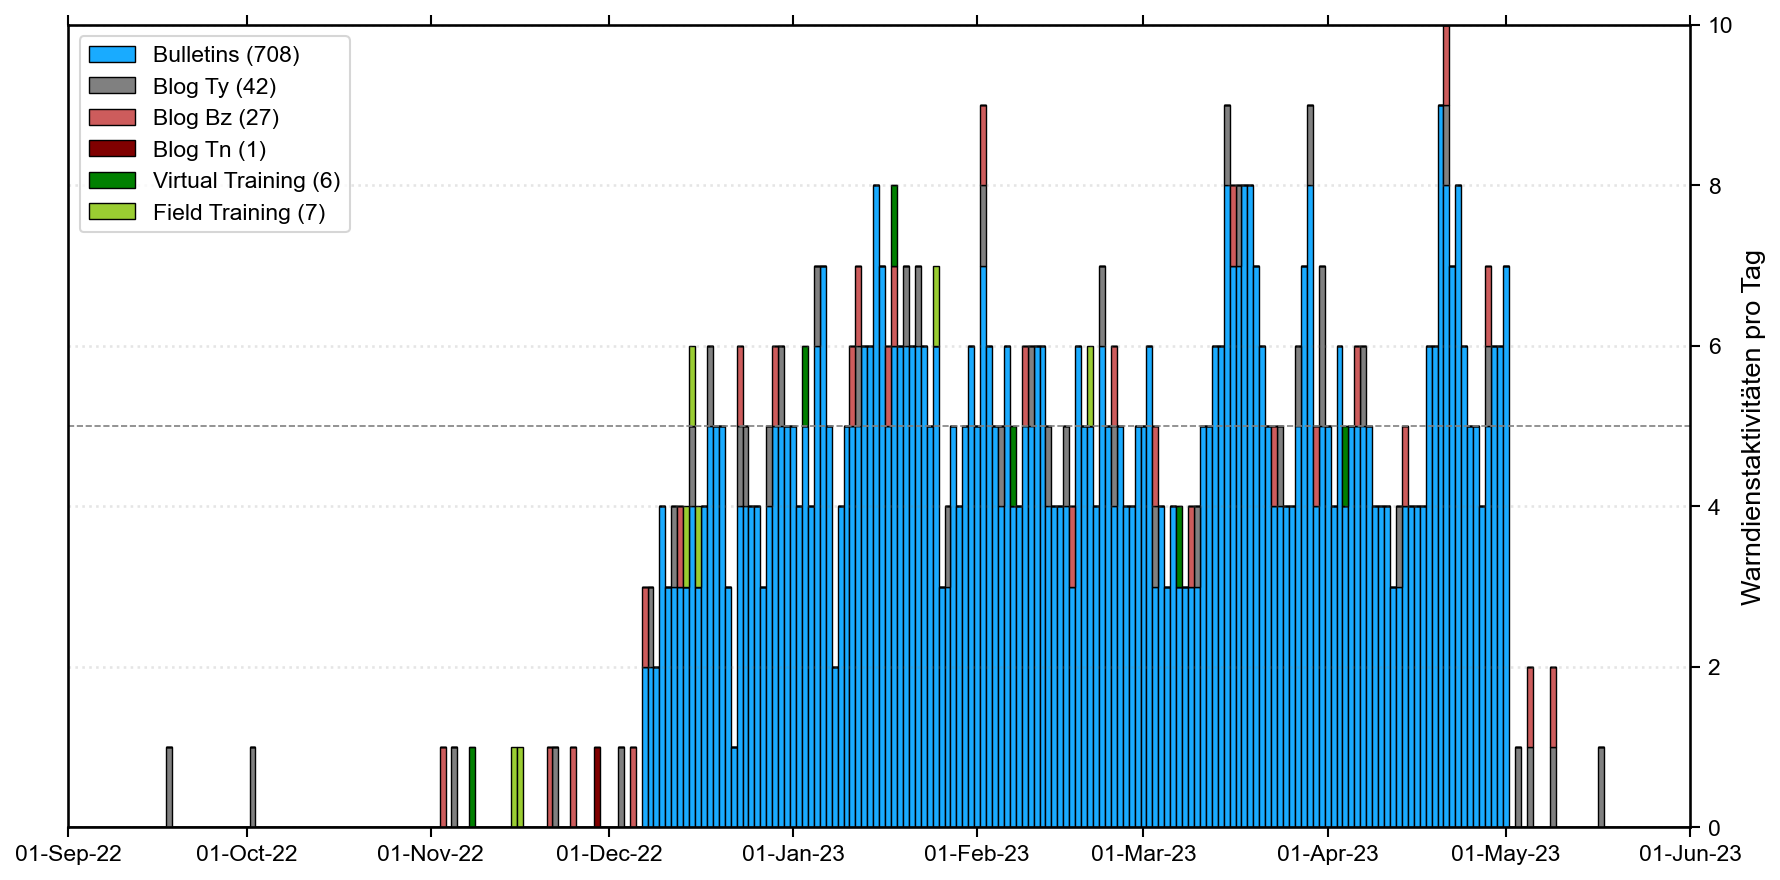

In [40]:
# - VISUALIZATION OF WARNING SERVICE ACTIVITIES OVER TIME - #
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.rcParams["font.family"] = "Arial"

def plot_warning_service_activities_over_time(ax):
    # w=df_danger_patterns.index[1]-df_danger_patterns.index[0]
    w=df_tasks.index[1]-df_tasks.index[0]
    blw=0.67
    bulletins_label = 'Bulletins (' + str(df_tasks['reports'].sum()) + ')'
    ty_label = 'Blog Ty (' + str(df_tasks['blogs_ty'].sum()) + ')'
    bz_label = 'Blog Bz (' + str(df_tasks['blogs_bz'].sum()) + ')'
    tn_label = 'Blog Tn (' + str(df_tasks['blogs_tn'].sum()) + ')'
    virtual_label = 'Virtual Training (' + str(df_tasks['virtual_training'].sum()) + ')'
    field_label = 'Field Training (' + str(df_tasks['field_training'].sum()) + ')'

    bar_plot = ax.bar(df_tasks.index, df_tasks.loc[:,'reports'], width=w, align='center', color='#19abff', edgecolor='black', lw=blw, label=bulletins_label)
    ax.bar(df_tasks.index, df_tasks.loc[:,'blogs_ty'], width=w, bottom=df_tasks.loc[:,'reports'], align='center', color='gray', edgecolor='black', lw=blw, label=ty_label)
    ax.bar(df_tasks.index, df_tasks.loc[:,'blogs_bz'], width=w, bottom=df_tasks.loc[:,'reports']+df_tasks.loc[:,'blogs_ty'], align='center', color='indianred', edgecolor='black', lw=blw, label=bz_label)
    ax.bar(df_tasks.index, df_tasks.loc[:,'blogs_tn'], width=w, bottom=df_tasks.loc[:,'reports']+df_tasks.loc[:,'blogs_ty']+df_tasks.loc[:,'blogs_bz'], align='center', color='maroon', edgecolor='black', lw=blw, label=tn_label)
    ax.bar(df_tasks.index, df_tasks.loc[:,'virtual_training'], width=w, bottom=df_tasks.loc[:,'reports']+df_tasks.loc[:,'blogs_ty']+df_tasks.loc[:,'blogs_bz']+df_tasks.loc[:,'blogs_tn'], align='center', color='#008000', edgecolor='black', lw=blw, label=virtual_label)
    ax.bar(df_tasks.index, df_tasks.loc[:,'field_training'], width=w, bottom=df_tasks.loc[:,'reports']+df_tasks.loc[:,'blogs_ty']+df_tasks.loc[:,'blogs_bz']+df_tasks.loc[:,'blogs_tn']+df_tasks.loc[:,'virtual_training'], align='center', color='#9ACD32', edgecolor='black', lw=blw, label=field_label)

    filtered_data = df_tasks.loc[:,'reports'][~(df_tasks.loc[:,'reports']==0)]
    ax.axhline(y=filtered_data.median(), color='gray', linestyle='--')

    ax.legend()

    # - AXES - #
    # ax.set_ylim(0,100)
    ax.set_xlim(df_tasks.index[0],df_tasks.index[-1])
    ax.set_ylabel("Warndienstaktivitäten pro Tag", fontsize=13) # Bulletins per day
    #ax.set_ylabel("Warning service activities per day") # Bulletins per day
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(axis='x')
    myLoc = mdates.MonthLocator()
    myFmt = mdates.DateFormatter('%d-%b-%y') # %Y-%b-%d
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(myLoc)
    # ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax

ax = plot_warning_service_activities_over_time(ax)

# - Include Meta data - #
# header_str = meta_dict['StationName'] + '\nAltitude: ' + meta_dict['Altitude'] + \
#             'm\nSlope Angle: ' + str(int(float(meta_dict['SlopeAngle']))) + '°\nExposure: ' + str(int(float(meta_dict['SlopeAzi'])))  + '°'
# fig.text(0.17,0.94,header_str,horizontalalignment='left',
#          verticalalignment='top', fontsize=10) # ma='left'

# --- Save figure --- #
filename  = 'bulletins-blogs-trainings-over-season'
out_dir   = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)

C:\Users\felix\AppData\Local\Temp\ipykernel_6876\3377505522.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(AVAPROBS_NAMES[::-1])
C:\Users\felix\AppData\Local\Temp\ipykernel_6876\1160131186.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(PATTERNS_NAMES[::-1])


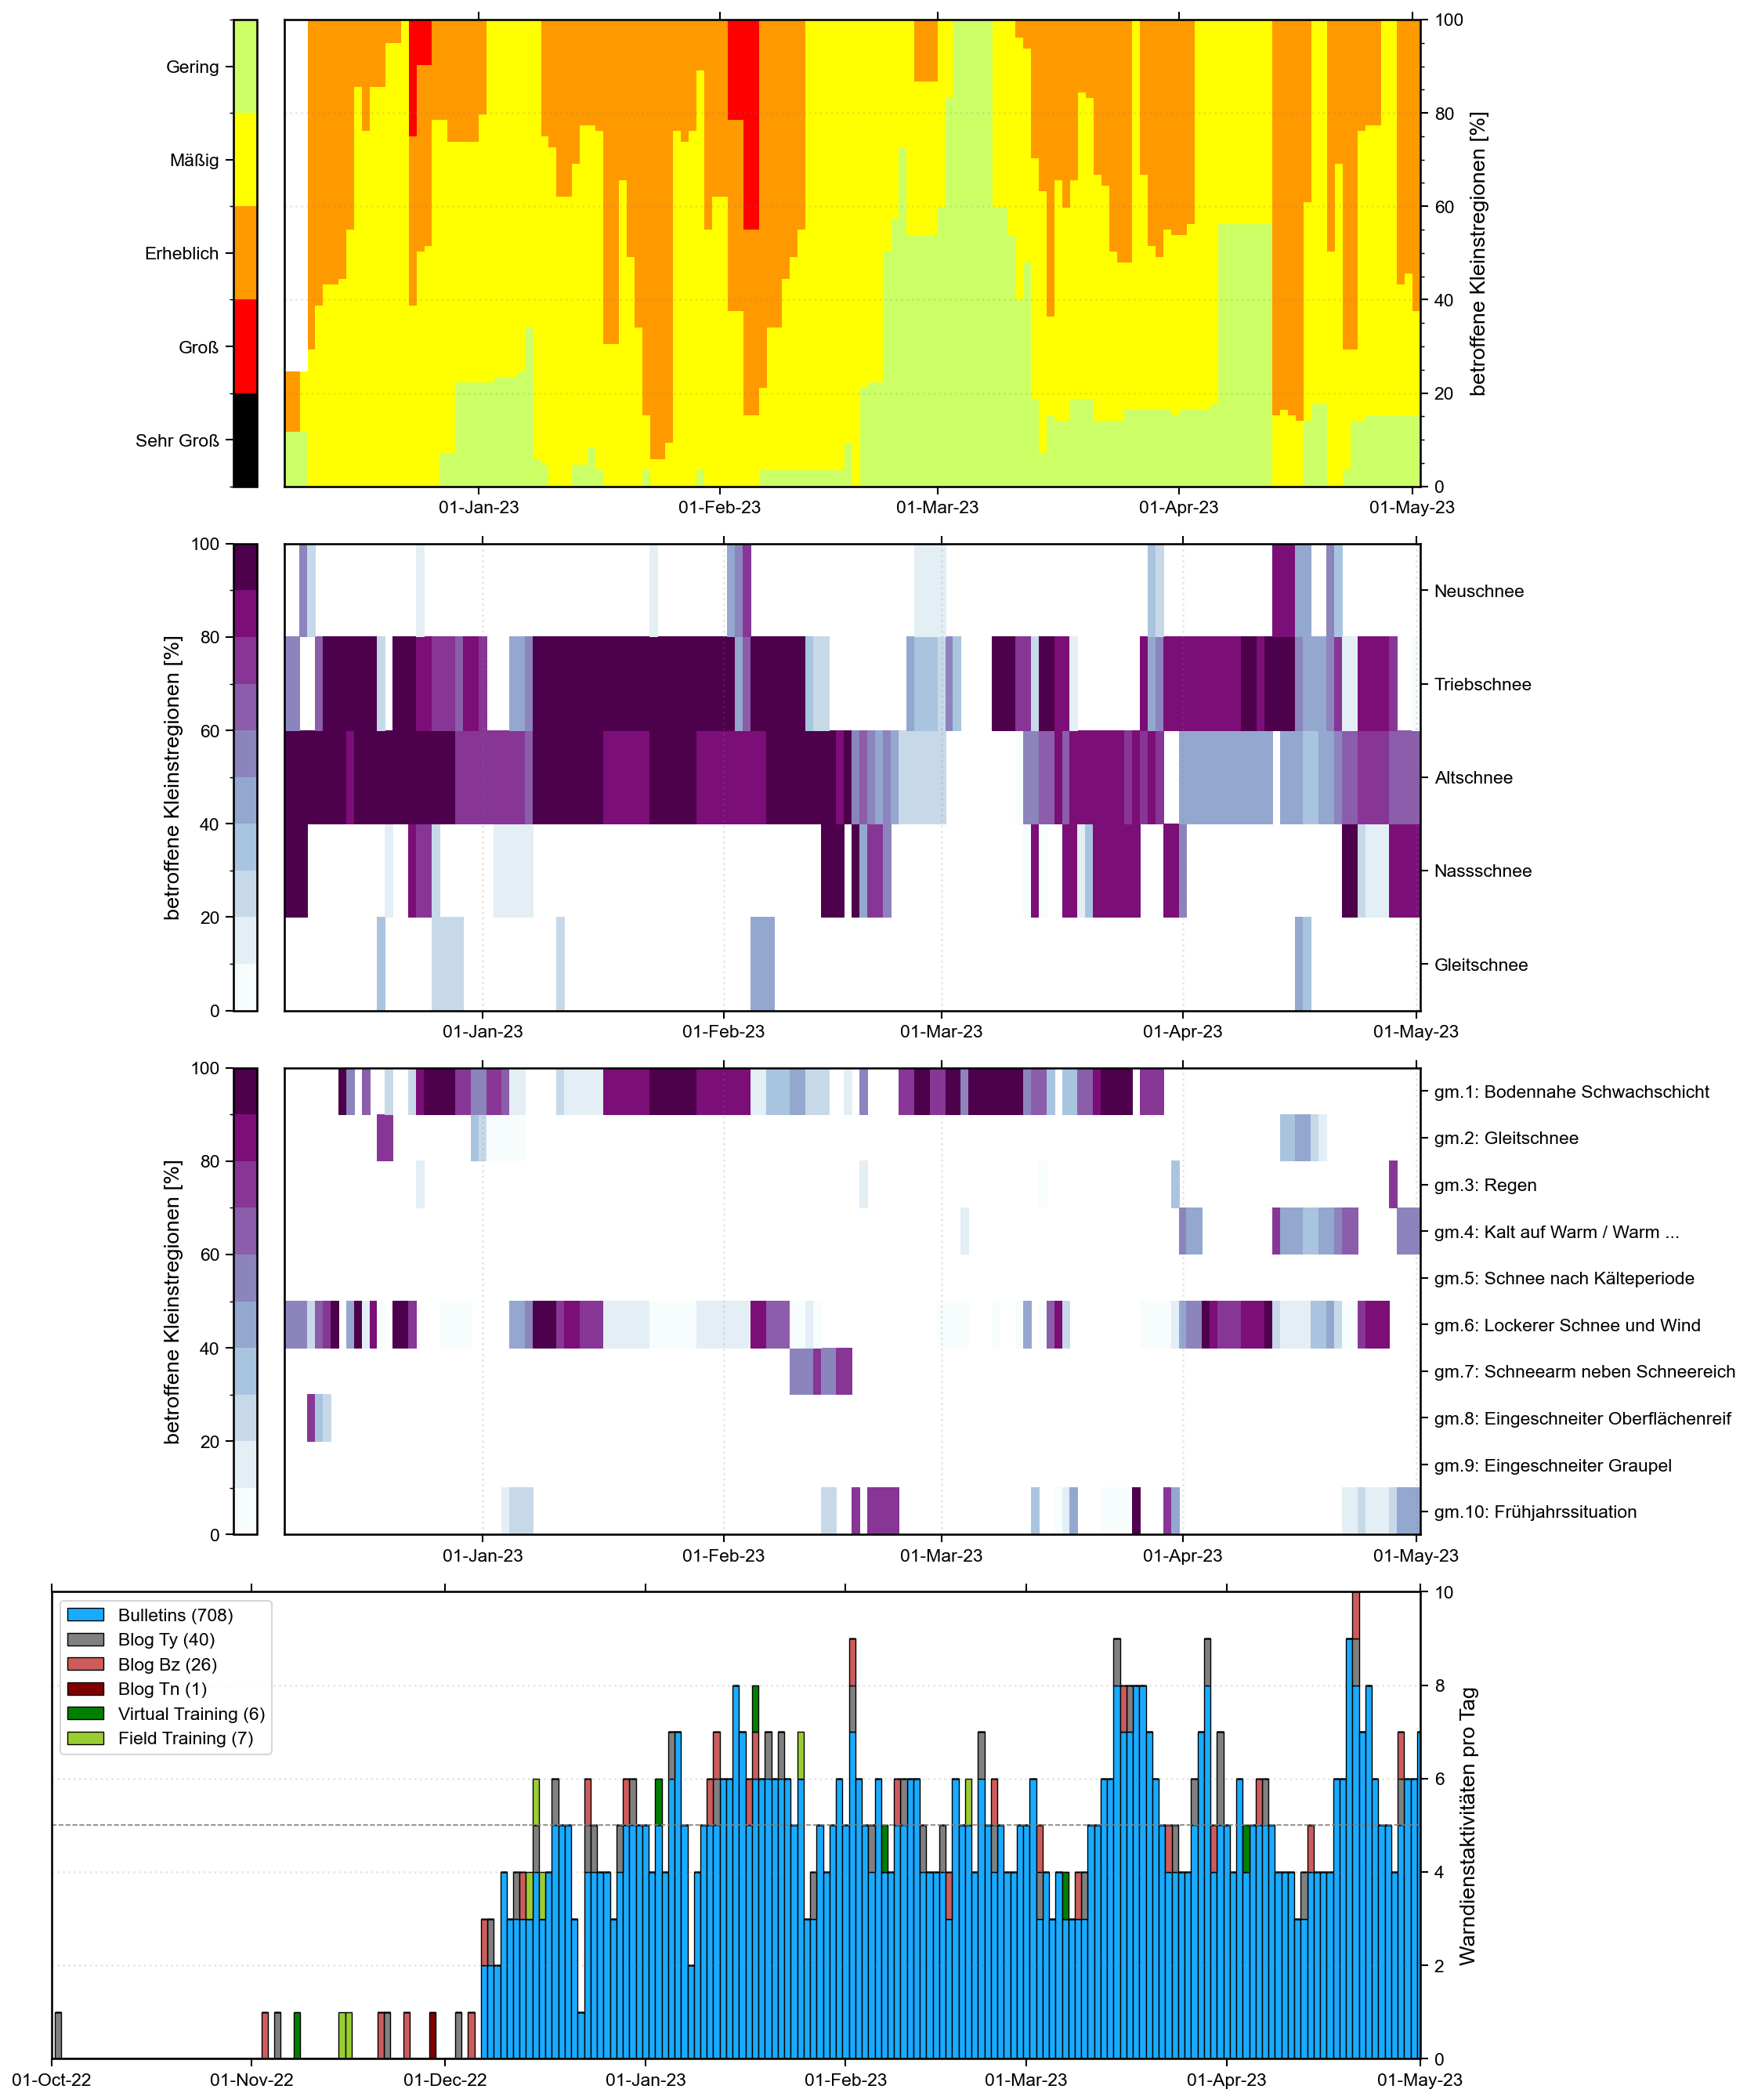

In [66]:
### - SEASON SUMMARY - #
"""
Figure showing...
- Danger levels
- Avalanche problems
- Danger patterns
- Warning service activities
- (avalanche accidents)
"""

# - VISUALIZATION - #
fig, axes = plt.subplots(4,1,figsize=(15,18))

# ----------- MAXIMUM DANGER LEVEL ------------ # 
ax = axes[0]
ax = plot_danger_levels_over_time(ax)


# ------------ AVALANCHE PROBLEMS ------------- # 
ax = axes[1]
ax = plot_avalanche_problems_over_time(ax)

# ------------- DANGER PATTERNS --------------- #
ax = axes[2]
ax = plot_danger_patterns_over_time(ax)

# -------- NUMBER OF BULLETINS PER DAY -------- # 
ax = axes[3] 
ax = plot_warning_service_activities_over_time(ax)
ax.set_xlim(df_tasks.index[30],df_danger_patterns.index[-1])

# --- Save figure --- #
filename  = 'season-summary'
out_dir   = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)

In [41]:
### - VISUALIZATION OF SOFTWARE UPDATES - ###

# color_palette = ['#ccff66','#ffff00','#ff9900','#ff0000','black']
color_palette = ['#008000','#9ACD32','#ccff66']

# - Load and process data - #
df_dev = pd.read_csv('data/2021-22_software-updates.csv',parse_dates=['Date'])
df_dev['Date'] = df_dev['Date'].dt.date
components = ['AdminGUI','Server', 'Website']
df_comps = pd.DataFrame(0, index=['count'], columns=components)
df_comps.loc['count','AdminGUI'] = (df_dev['Component']=='Admin GUI').sum()
df_comps.loc['count','Server'] = (df_dev['Component']=='Server').sum()
df_comps.loc['count','Website'] = (df_dev['Component']=='Website').sum()

fig, ax = plt.subplots(figsize=(6,6)) 
ax.grid(False)
ax.grid(axis='y')
# ax.bar(df_avg.index+0.2,df_avg['freq'],width=0.67,color='lightgrey',align='center',alpha=0.67, label='10-year average (Alps)')
ax.bar(df_comps.columns,df_comps.loc['count',:],width=0.67,color=color_palette, edgecolor='black',align='center') # bottom=df['bottom'], alpha=0.4
plt.ylabel('# Updates') # fontsize=15

# Save Plot to File
filename = "software-updates-histogram"
out_dir = "output"
directory = Path(out_dir)
directory.mkdir(parents=True, exist_ok=True)

fig.tight_layout()
fig.savefig(f'{out_dir}/{filename}.png', facecolor='w', edgecolor='w',
            format='png', dpi=300)
# fig.savefig(f'{out_dir}/{filename}.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'data/2021-22_software-updates.csv'